# ACTIVIDAD 1 - BÚSQUEDA (Algoritmos DFS, BFS, Greedy, A*)

Librerías que utilizaremos para realizar la actividad:

In [20]:
import osmnx as ox
import random
import heapq
import math
import matplotlib.pyplot as plt
import networkx as nx

## Carga del mapa y estilos
Aquí deberán cargar el mapa en la ubicación que deseen, con la funcion ```python ox.graph_from_place``` obtendremos un grafo dirigido con la información del mapa, incluidos sus nodos y aristas (calles que unen los nodos)

In [2]:
lugar = "Guaymallen, Mendoza, Argentina" # Ej: "Godoy Cruz, Mendoza, Argentina"
G = ox.graph_from_place(lugar, network_type="drive")

Funciones para dar estilo al mapa, pueden modificar colores y tamaños de los elementos, o ignorar esta celda si no desean modificar el estilo del mapa.

In [3]:
def arista_no_visitada(edge):        
    G.edges[edge]["color"] = "#22609b"
    G.edges[edge]["alpha"] = 0.2
    G.edges[edge]["linewidth"] = 0.5

def arista_visitada(edge):
    G.edges[edge]["color"] = "#22609b"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def arista_activa(edge):
    G.edges[edge]["color"] = 'lightblue'
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def arista_solucion(edge):
    G.edges[edge]["color"] = "white"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

Función que modifica el gráfico para aplicar los estilos que vayamos dando a cada nodo o arista

In [4]:
def plot_graph():
    ox.plot_graph(
        G,
        node_size =  [ G.nodes[node]["size"] for node in G.nodes ],
        edge_color = [ G.edges[edge]["color"] for edge in G.edges ],
        edge_alpha = [ G.edges[edge]["alpha"] for edge in G.edges ],
        edge_linewidth = [ G.edges[edge]["linewidth"] for edge in G.edges ],
        node_color = "white",
        bgcolor = "#001028"
    )

## Implementación de los algoritmos
En todos los casos, las funciones recibirán el grafo G, el nodo de inicio y el nodo de la meta

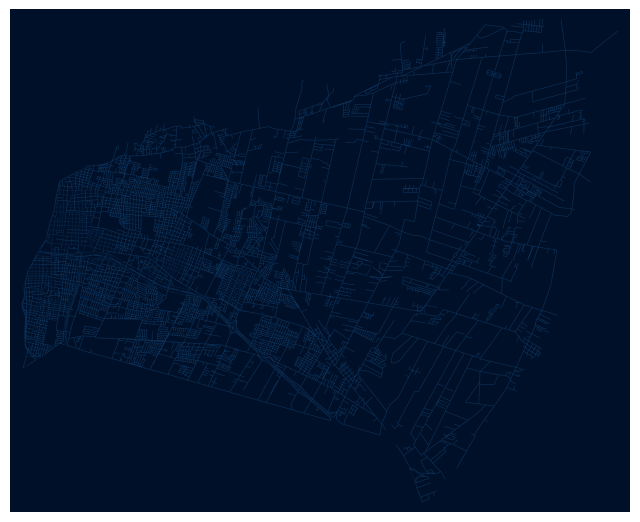

In [5]:
for node in G.nodes:
    G.nodes[node]["size"] = 0
for edge in G.edges:
    arista_no_visitada(edge)
    
plot_graph()

Seleccionamos dos nodos del grafo al azar utilizando random:

In [6]:
inicio = random.choice(list(G.nodes))
print(f"Inicio: {inicio}")
meta = random.choice(list(G.nodes))
print(f"Meta: {meta}")

Inicio: 2161067458
Meta: 5284442814


### Búsqueda no informada

In [7]:
def dfs(G, inicio, meta):
    # Implementar el algoritmo Depth-First Search
    # Pista: utilizar los 5 pasos que vimos en clase para ir explorando los nodos
    # 1) Dar estilo a nodos y aristas (estilos iniciales)
    
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30
        
    for edge in G.edges:
        arista_no_visitada(edge) 
    
    frontera = [inicio]
    
    explorados = []
    
    while True:
        if len(frontera) == 0:
            print("Frontera vacia, sin solución")
            break
        nodo_actual = frontera.pop() 
        
        if nodo_actual == meta:
            print("Llegamos")
            solucion = []
            while nodo_actual is not None:
                solucion.append(G.nodes[nodo_actual]["padre"])
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.pop()
            solucion.reverse()
            
            return solucion ,explorados
       
        for arista in G.out_edges(nodo_actual):
            arista_visitada((arista[0], arista[1], 0))
            vecino = arista[1]
            if vecino not in explorados and vecino not in frontera:
               G.nodes[vecino]["padre"] = nodo_actual
               frontera.append(vecino)
               arista_activa ((arista[0], arista[1], 0)) 
        explorados.append(nodo_actual)
                            
    # 2) Los nodos presentan son diccionarios con las siguientes claves:
    #   - "y": coordenadas y del nodo
    #   - "x": coordenadas x del nodo
    #   - "street_count": numero de calles que salen del nodo
    # 3) Para dar los estilos iniciales, todos los nodos deberian tener un size de 0, a menos que sean el inicio o la meta,
    # en ese caso dar un poco mas de tamaño para que sean visibles en el mapa
    # 4) Todos los nodos deberán tener un nodo "padre" (para el incio, el padre es None)
    # 5) Inicializar la frontera con el nodo inicial dentro
    # 6) Inicializar lista de nodos explorados
    # 7) Bucle principal (revisar teoria)
    pass

In [8]:
def bfs(G, inicio, meta):
    # Paso 1: Dar estilo a nodos y aristas (estilos iniciales)
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30
        
    for edge in G.edges:
        arista_no_visitada(edge) 
    
    # Paso 2: Inicializar la frontera con el nodo inicial dentro (utilizamos una lista)
    frontera = [inicio]
    
    explorados = []
    
    while frontera:
        # Paso 3: Obtener el primer nodo de la frontera (utilizamos pop(0) para una cola)
        nodo_actual = frontera.pop(0) 
        
        if nodo_actual == meta:
            print("Llegamos")
            solucion = []
            while nodo_actual is not None:
                solucion.append(nodo_actual)
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.reverse()
            return solucion
       
        for arista in G.out_edges(nodo_actual):
            arista_visitada((arista[0], arista[1], 0))
            vecino = arista[1]
            if vecino not in explorados and vecino not in frontera:
                # Paso 4: Asignar el padre del vecino y agregarlo a la frontera
                G.nodes[vecino]["padre"] = nodo_actual
                frontera.append(vecino)
                arista_activa((arista[0], arista[1], 0)) 
        # Paso 5: Marcar el nodo actual como explorado
        explorados.append(nodo_actual)

# Llamar a la función bfs para realizar la búsqueda en anchura
solucion_bfs = bfs(G, inicio, meta)
print("Camino de la solución BFS:", solucion_bfs)


pass

Llegamos
Camino de la solución BFS: [2161067458, 11754201519, 11754201523, 1670654600, 1107797610, 1670654481, 1670654669, 1755112573, 10827225017, 10827225018, 10827225021, 10827225034, 2489652557, 1756125312, 2322650832, 8061437221, 8061437218, 10826143706, 10826143796, 1756125191, 2322673213, 1756125167, 2322673210, 2322673208, 1755112446, 5767376386, 10826143776, 5767376388, 7187867088, 1865257610, 10826143705, 7187867041, 10826143703, 7187867037, 5284442814]


### Búsqueda informada

In [9]:
def heuristica(nodo_1, nodo_2):
    x1, y1 = nodo_1['x'], nodo_1['y']
    x2, y2 = nodo_2['x'], nodo_2['y']
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
 

In [10]:
def gbfs(G, inicio, meta):
    frontera = [(heuristica(G.nodes[inicio], G.nodes[meta]), inicio)]
    explorados = set()  
    while frontera:
        distancia_actual, nodo_actual = heapq.heappop(frontera)
        if nodo_actual == meta:
            print("Llegamos")
            solucion = []
            while nodo_actual is not None:
                solucion.append(nodo_actual)
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.reverse()
            return solucion, list(explorados)  # Devolver la solución y la lista de nodos explorados
        explorados.add(nodo_actual)
        for arista in G.out_edges(nodo_actual):
            vecino = arista[1]
            if vecino not in explorados:
                distancia_heuristica = heuristica(G.nodes[vecino], G.nodes[meta])
                heapq.heappush(frontera, (distancia_heuristica, vecino))


In [24]:


def a_estrella(G, inicio, meta):
    frontera = [(0 + heuristica(G.nodes[inicio], G.nodes[meta]), inicio)]
    explorados = set()  
    costo_acumulado = {inicio: 0}  
    while frontera:
        costo_actual, nodo_actual = heapq.heappop(frontera)
        if nodo_actual == meta:
            print("Llegamos")
            solucion = []
            while nodo_actual is not None:
                solucion.append(nodo_actual)
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.reverse()
            return solucion, list(explorados)  
        explorados.add(nodo_actual)
        for arista in G.out_edges(nodo_actual, data=True):  
            vecino = arista[1]
            costo_arista = arista[2].get('weight', 1)  
            nuevo_costo_acumulado = costo_acumulado[nodo_actual] + costo_arista
            if vecino not in explorados or nuevo_costo_acumulado < costo_acumulado.get(vecino, float('inf')):
                costo_acumulado[vecino] = nuevo_costo_acumulado
                distancia_heuristica = heuristica(G.nodes[vecino], G.nodes[meta])
                prioridad = nuevo_costo_acumulado + distancia_heuristica
                heapq.heappush(frontera, (prioridad, vecino))


## Ejecución y análisis


In [12]:
def dibujar_solucion (inicio, meta):
    for arista in G.edges:
        arista_no_visitada(arista)
    nodo_actual = meta
    distancia = 0
    while nodo_actual != inicio:
        G.nodes[nodo_actual]["size"] = 0
        padre = G.nodes[nodo_actual]["padre"]
        arista_solucion((padre, nodo_actual, 0))
        distancia += G.edges[(padre, nodo_actual, 0)]["length"]
        nodo_actual = padre
    print("Distancia recorrida: " + str(distancia))
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30
    plot_graph()
    

In [13]:
def mostrar_camino_explorados(G, inicio, meta, solucion):
    for arista in G.edges:
        arista_no_visitada(arista)
    explorados = set()
    nodo_actual = meta
    distancia = 0
    while nodo_actual != inicio:
        G.nodes[nodo_actual]["size"] = 0
        padre = G.nodes[nodo_actual]["padre"]
        arista_solucion((padre, nodo_actual, 0))
        distancia += G.edges[(padre, nodo_actual, 0)]["length"]
        nodo_actual = padre
    print("Distancia recorrida:", distancia)
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30
    plot_graph()

In [14]:
def mostrar_camino_optimo(G, inicio, meta, solucion_optima):
    # Marcar las aristas del camino óptimo
    for i in range(len(solucion_optima) - 1):
        arista_solucion((solucion_optima[i], solucion_optima[i + 1], 0))
    
    # Dibujar el mapa con los estilos actualizados
    plot_graph()


## 1. Depth-First Search


Llegamos
([2161067458, 11754201519, 11754201523, 1670654600, 1107797610, 1670654481, 1670654669, 1755112573, 11754201503, 1107797447, 7186326664, 1755112569, 1755112567, 10826143682, 1756125312, 2322650832, 8061437221, 8061437220, 10826143709, 10826143706, 10826143796, 1756125191, 10826143794, 8748746287, 8748746288, 2322673192, 1756125209, 2322650799, 2322650800, 1845790980, 1845790985, 7187959469, 1845790987, 7187959467, 1845790989, 1845790986, 1845790988, 5284443395, 1845790984, 1845790979, 1845790976, 1845790973, 1845790968, 7187959473, 10826143867, 3479589304, 2322673193, 1748658820, 3479589305, 5411150459, 1845790938, 8061437302, 2322682371, 2322682355, 2613804014, 2322682354, 7189206846, 3479593455, 2322682353, 10828786007, 10828785995, 2322682352, 2322682315, 2322682323, 2613804029, 2613804038, 10828786114, 2613804023, 10828786133, 10828786127, 10828786129, 10828786131, 5771471179, 7192470514, 7192470513, 5771471183, 10828786113, 10828786112, 5771471186, 5771471180, 5771471187,

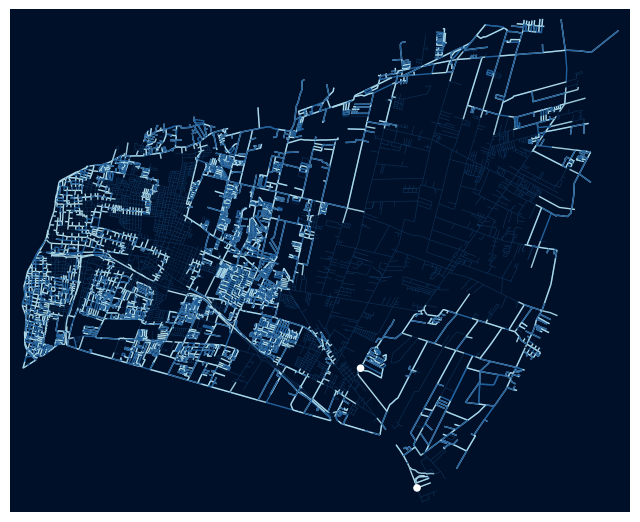

In [15]:
solucion = dfs(G, inicio , meta)
print(solucion)
plot_graph()

Distancia recorrida: 177032.1700000001


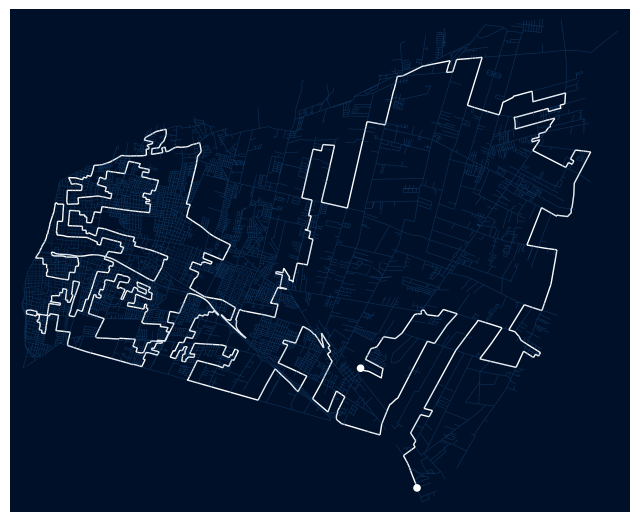

In [16]:
dibujar_solucion(inicio, meta)

## 2. Breadth-First Search

Llegamos
[2161067458, 11754201519, 11754201523, 1670654600, 1107797610, 1670654481, 1670654669, 1755112573, 10827225017, 10827225018, 10827225021, 10827225034, 2489652557, 1756125312, 2322650832, 8061437221, 8061437218, 10826143706, 10826143796, 1756125191, 2322673213, 1756125167, 2322673210, 2322673208, 1755112446, 5767376386, 10826143776, 5767376388, 7187867088, 1865257610, 10826143705, 7187867041, 10826143703, 7187867037, 5284442814]


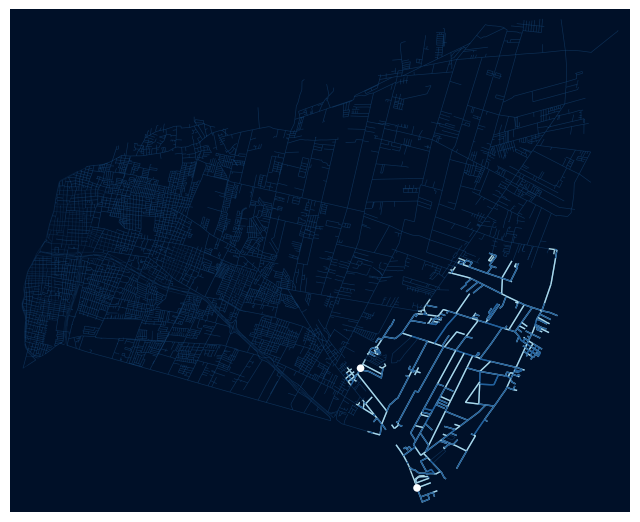

In [17]:
solucion = bfs(G, inicio , meta)
print(solucion)
plot_graph()

Distancia recorrida: 11567.864000000003


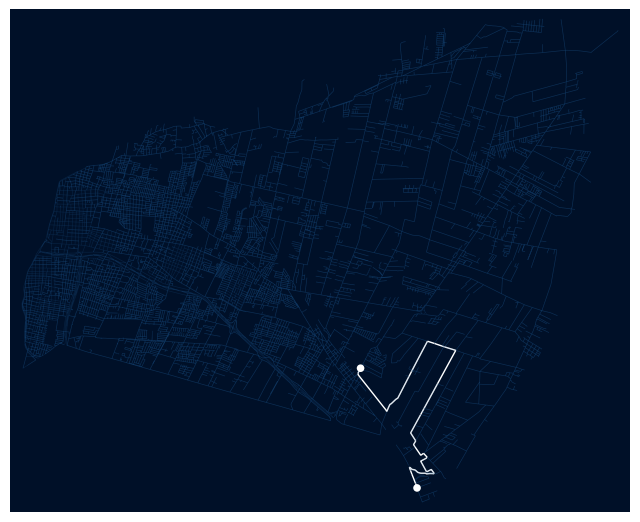

In [18]:
dibujar_solucion(inicio, meta)

## 3. Greedy Best-First Search

Llegamos


<Figure size 1000x1000 with 0 Axes>

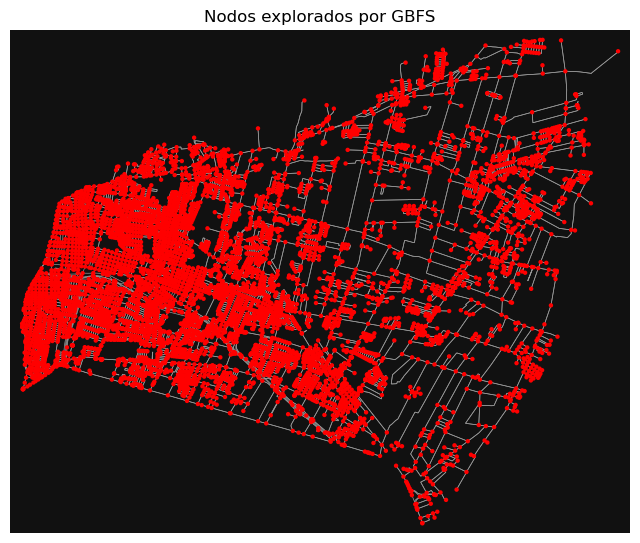

In [21]:
def mostrar_nodos_explorados(G, explorados):
    plt.figure(figsize=(10, 10))
    ox.plot_graph(G, node_color='red', node_size=10, edge_linewidth=0.5, show=False)
    nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), nodelist=explorados, node_color='blue', node_size=10)
    plt.title('Nodos explorados por GBFS')
    plt.show()

# Llama a la función gbfs para obtener la solución y la lista de nodos explorados
solucion_gbfs, nodos_explorados_gbfs = gbfs(G, inicio, meta)

# Muestra los nodos explorados en el mapa
mostrar_nodos_explorados(G, nodos_explorados_gbfs)

<Figure size 1000x1000 with 0 Axes>

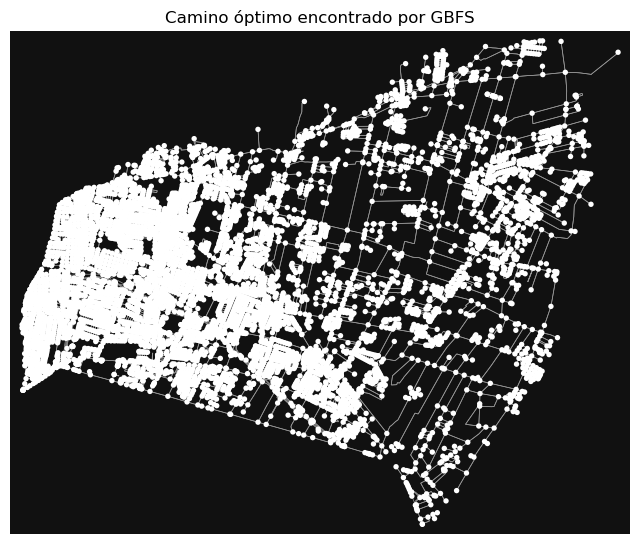

In [26]:
def mostrar_camino_optimo(G, solucion):
    plt.figure(figsize=(10, 10))
    ox.plot_graph(G, node_color='white', edge_linewidth=0.5, show=False)
    ox.plot_graph_route(G, solucion, route_color='green', route_linewidth=2, show=False)
    plt.title('Camino óptimo encontrado ')
    plt.show()
    
mostrar_camino_optimo(G, solucion_gbfs)

## 4. A* Search

Llegamos


<Figure size 1000x1000 with 0 Axes>

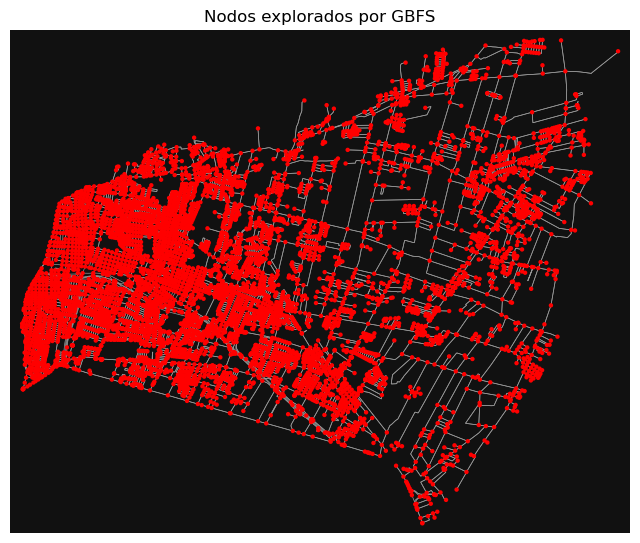

<Figure size 1000x1000 with 0 Axes>

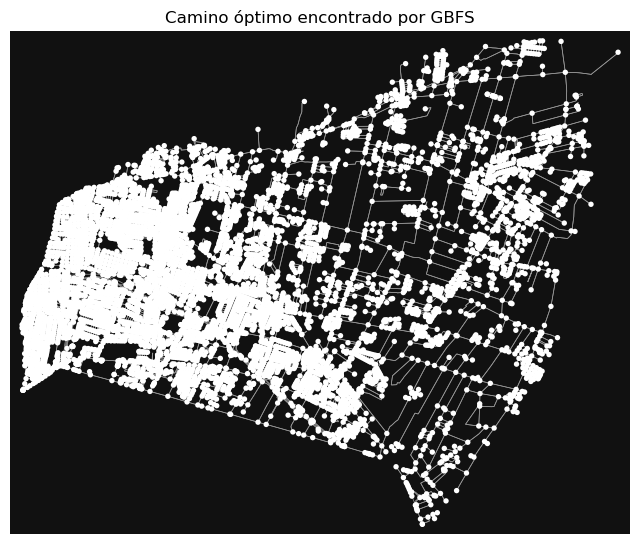

In [25]:
solucion_a_estrella, nodos_explorados_a_estrella = a_estrella(G, inicio, meta)

# Muestra los nodos explorados en el mapa
mostrar_nodos_explorados(G, nodos_explorados_a_estrella)

# Muestra el camino óptimo en el mapa
mostrar_camino_optimo(G, solucion_a_estrella)